In [1]:
import mysql.connector
import pandas as pd
connection = mysql.connector.connect(
user='root',
password='root',
host='localhost',
database=' Ecommerce_Data'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])


Printing first 5 records from each table

In [2]:
print("Customer Table data:- ")
print(customer_data.head())

Customer Table data:- 
  customer_id           name         city                     email  \
0     CUST001       John Doe     New York       johndoe@example.com   
1     CUST002     Jane Smith  Los Angeles     janesmith@example.com   
2     CUST003    Emily Davis     New York    emilydavis@example.com   
3     CUST004  Michael Brown      Chicago  michaelbrown@example.com   
4     CUST005   Sarah Wilson     New York   sarahwilson@example.com   

     phone_no       address  pin_code  
0  1234567890   123 Main St     10001  
1  1234567891    456 Elm St     90001  
2  1234567892   789 Pine St     10002  
3  1234567893    101 Oak St     60601  
4  1234567894  202 Maple St     10003  


In [3]:
print("Product Table data:- ")
print(product_data.head())

Product Table data:- 
  product_id        product_name     category   sub_category  original_price  \
0    PROD001     Apple iPhone 13  Electronics  Mobile Phones          999.99   
1    PROD002  Samsung Galaxy S21  Electronics  Mobile Phones          799.99   
2    PROD003     Sony WH-1000XM4  Electronics     Headphones          349.99   
3    PROD004         Dell XPS 13    Computers        Laptops         1199.99   
4    PROD005      MacBook Air M1    Computers        Laptops          999.99   

   selling_price  stock  
0         899.99     50  
1         749.99     40  
2         299.99    100  
3        1099.99     25  
4         949.99     30  


In [4]:
print("Order Table data:- ")
print(order_data.head())

Order Table data:- 
   order_id customer_id product_id  quantity  total_price payment_mode  \
0         1     CUST001    PROD001       1.0       899.99  Credit Card   
1         2     CUST002    PROD003       2.0       599.98       PayPal   
2         3     CUST003    PROD005       1.0       949.99  Credit Card   
3         4     CUST004    PROD007       3.0      1049.97   Debit Card   
4         5     CUST005    PROD009       1.0       249.99  Credit Card   

           order_date order_status  
0 2024-08-01 10:15:00      Shipped  
1 2024-08-02 12:30:00    Delivered  
2 2024-08-03 15:45:00   Processing  
3 2024-08-04 11:20:00    Cancelled  
4 2024-08-05 09:00:00      Shipped  


checking Shape of data

In [5]:
customer_data.shape

(100, 7)

In [6]:
product_data.shape

(100, 7)

In [7]:
order_data.shape

(100, 8)

Checking Columns of each table

In [8]:
customer_data.columns

Index(['customer_id', 'name', 'city', 'email', 'phone_no', 'address',
       'pin_code'],
      dtype='object')

In [9]:
product_data.columns

Index(['product_id', 'product_name', 'category', 'sub_category',
       'original_price', 'selling_price', 'stock'],
      dtype='object')

In [10]:
order_data.columns

Index(['order_id', 'customer_id', 'product_id', 'quantity', 'total_price',
       'payment_mode', 'order_date', 'order_status'],
      dtype='object')

Cleaning Data:- 

Checking Table Column Data Type is appropiate or not according to filed

In [11]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  100 non-null    object
 1   name         100 non-null    object
 2   city         100 non-null    object
 3   email        100 non-null    object
 4   phone_no     100 non-null    object
 5   address      100 non-null    object
 6   pin_code     100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [12]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      100 non-null    object 
 1   product_name    100 non-null    object 
 2   category        100 non-null    object 
 3   sub_category    100 non-null    object 
 4   original_price  100 non-null    float64
 5   selling_price   100 non-null    float64
 6   stock           100 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [13]:
product_data['original_price'] = product_data['original_price'].astype(int)
product_data['selling_price'] = product_data['selling_price'].astype(int)

In [14]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      100 non-null    object
 1   product_name    100 non-null    object
 2   category        100 non-null    object
 3   sub_category    100 non-null    object
 4   original_price  100 non-null    int64 
 5   selling_price   100 non-null    int64 
 6   stock           100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [15]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      100 non-null    int64         
 1   customer_id   100 non-null    object        
 2   product_id    100 non-null    object        
 3   quantity      100 non-null    float64       
 4   total_price   100 non-null    float64       
 5   payment_mode  100 non-null    object        
 6   order_date    100 non-null    datetime64[ns]
 7   order_status  100 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.4+ KB


In [16]:
order_data['quantity'] = order_data['quantity'].astype(int)
order_data['total_price'] = order_data['total_price'].astype(int)

In [17]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      100 non-null    int64         
 1   customer_id   100 non-null    object        
 2   product_id    100 non-null    object        
 3   quantity      100 non-null    int64         
 4   total_price   100 non-null    int64         
 5   payment_mode  100 non-null    object        
 6   order_date    100 non-null    datetime64[ns]
 7   order_status  100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 6.4+ KB


Checking Null Values and Removing if Presennt

In [18]:
customer_data.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [19]:
product_data.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [20]:
order_data.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

Checking Duplicates Values

In [21]:
duplicates = customer_data[customer_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code]
Index: []


In [22]:
duplicates = product_data[product_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock]
Index: []


In [23]:
duplicates = order_data[order_data.duplicated()]

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


Exploratory Data Analysis (EDA) and Visualization:

 # Customer Analysis:-

○ Identify the total number of customers City wise.

city
New York         27
Chicago          25
Los Angeles      25
San Francisco    23
Name: customer_id, dtype: int64


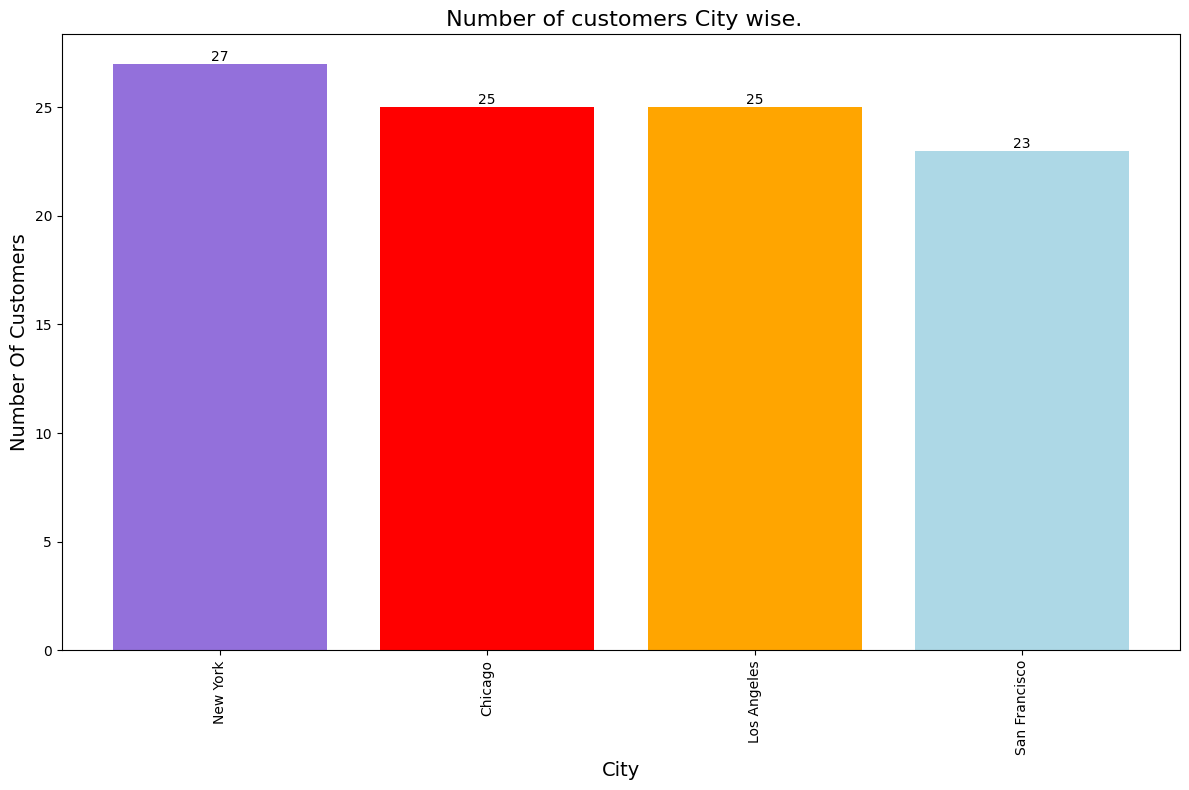

In [24]:
import matplotlib.pyplot as plt
total_customer = customer_data.groupby('city')['customer_id'].count().sort_values(ascending=False)
print(total_customer)
plt.figure(figsize=(12, 8))
bars = plt.bar(total_customer.index, total_customer.values, color=['mediumpurple','red','orange','lightblue'])
plt.xticks(rotation=90)
plt.title(' Number of customers City wise.', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number Of Customers', fontsize=14)
plt.bar_label(bars)
plt.tight_layout()
plt.show()

○ Identify the most frequent customers based on their order history.

customer_id
CUST024    4
CUST032    4
CUST016    4
CUST008    4
CUST076    4
          ..
CUST087    1
CUST095    1
CUST093    1
CUST097    1
CUST099    1
Name: quantity, Length: 100, dtype: int64


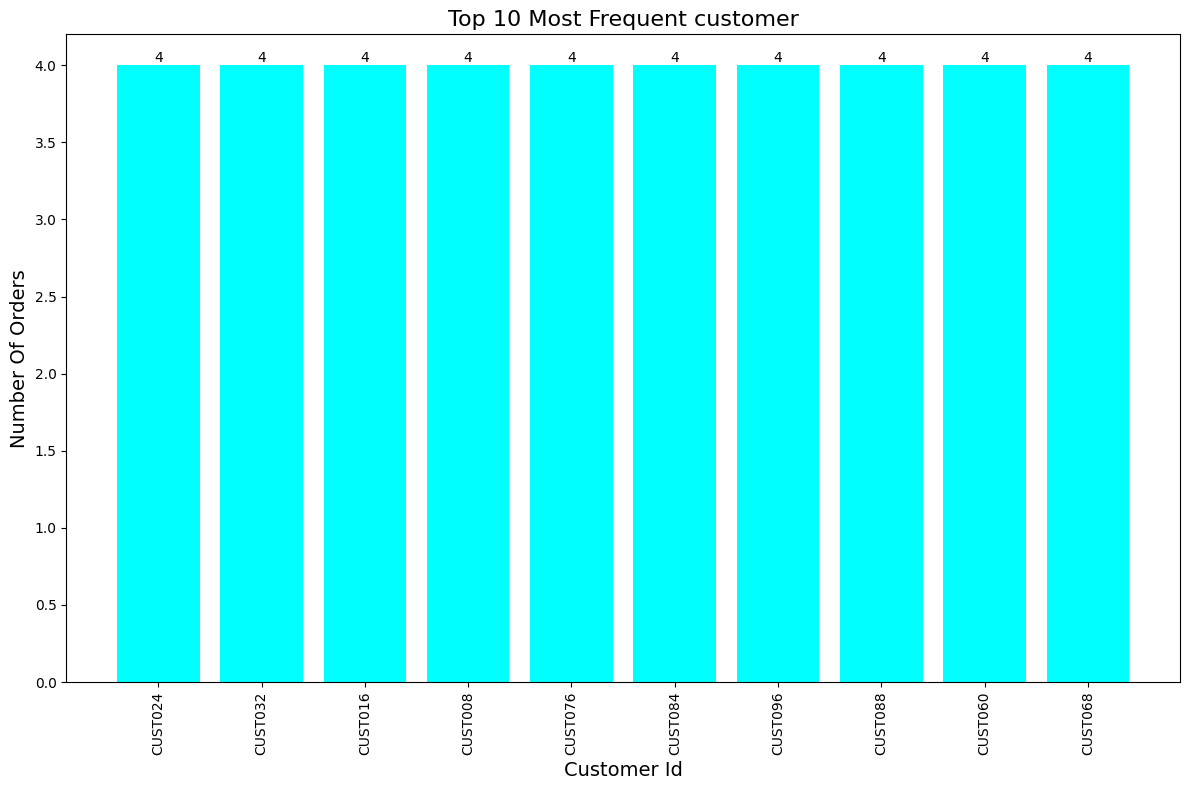

In [25]:
import matplotlib.pyplot as plt
total_customer = order_data.groupby('customer_id')['quantity'].sum().sort_values(ascending=False)
print(total_customer)
plt.figure(figsize=(12, 8))
bars = plt.bar(total_customer.index[:10], total_customer.values[:10], color='cyan')
plt.xticks(rotation=90)
plt.title('Top 10 Most Frequent customer', fontsize=16)
plt.xlabel('Customer Id', fontsize=14)
plt.ylabel('Number Of Orders', fontsize=14)
plt.bar_label(bars)
plt.tight_layout()
plt.show()

 #  Product Analysis:- 

○ Determine the total number of products available by category

category
Electronics    56
Computers      25
Cameras         8
Tablets         6
Gaming          3
Smart Home      2
Name: product_id, dtype: int64


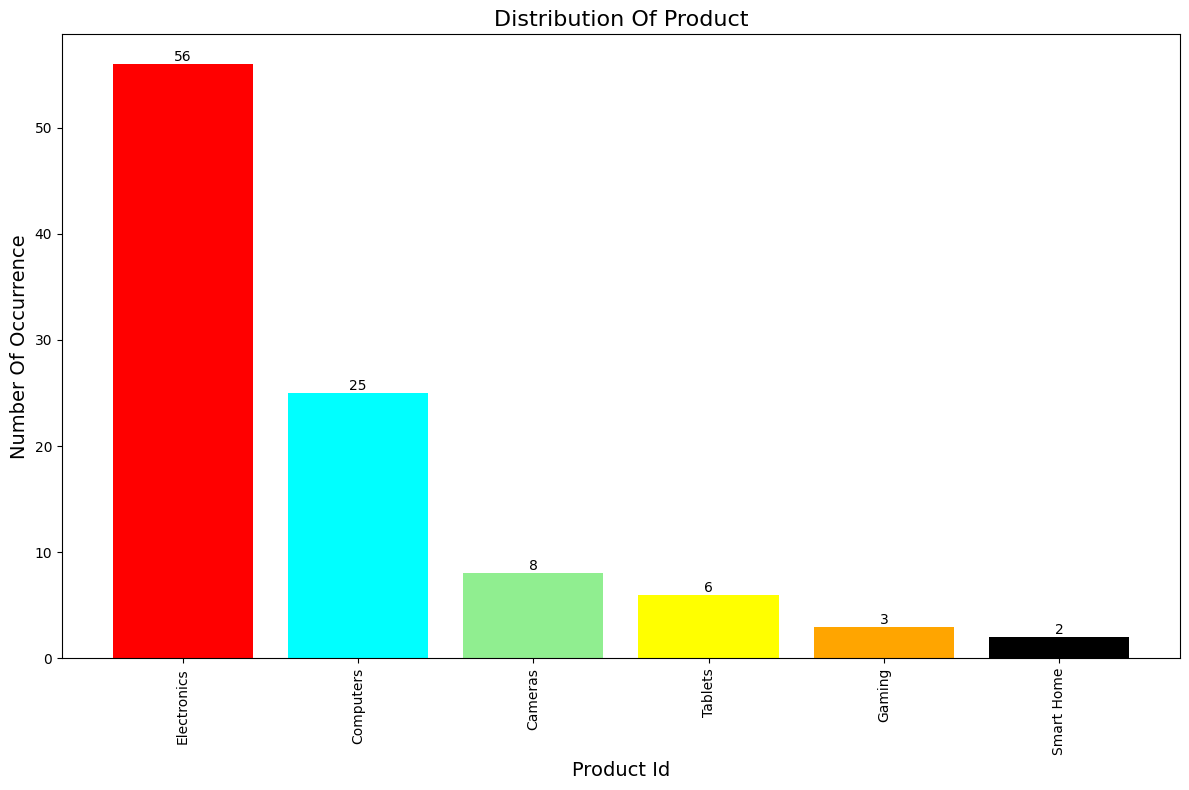

In [26]:
import matplotlib.pyplot as plt
total_customer = product_data.groupby('category')['product_id'].count().sort_values(ascending=False)
print(total_customer)
plt.figure(figsize=(12, 8))
bars = plt.bar(total_customer.index, total_customer.values, color=['red','cyan','lightgreen','yellow','orange','black'])
plt.xticks(rotation=90)
plt.title('Distribution Of Product', fontsize=16)
plt.xlabel('Product Id', fontsize=14)
plt.ylabel('Number Of Occurrence', fontsize=14)
plt.bar_label(bars)
plt.tight_layout()
plt.show()

○ Analyze the distribution of products across sub-categories

sub_category
Accessories       21
Headphones        14
Gaming Laptops     9
Laptops            9
Tablets            7
Wearables          5
Mirrorless         5
Speakers           4
Televisions        3
Mobile Phones      3
Consoles           3
Storage            3
Media Players      2
DSLR               2
Networking         2
Monitors           2
Action Cameras     1
Desktops           1
Drones             1
Smart Home         1
Security           1
Thermostats        1
Name: product_id, dtype: int64


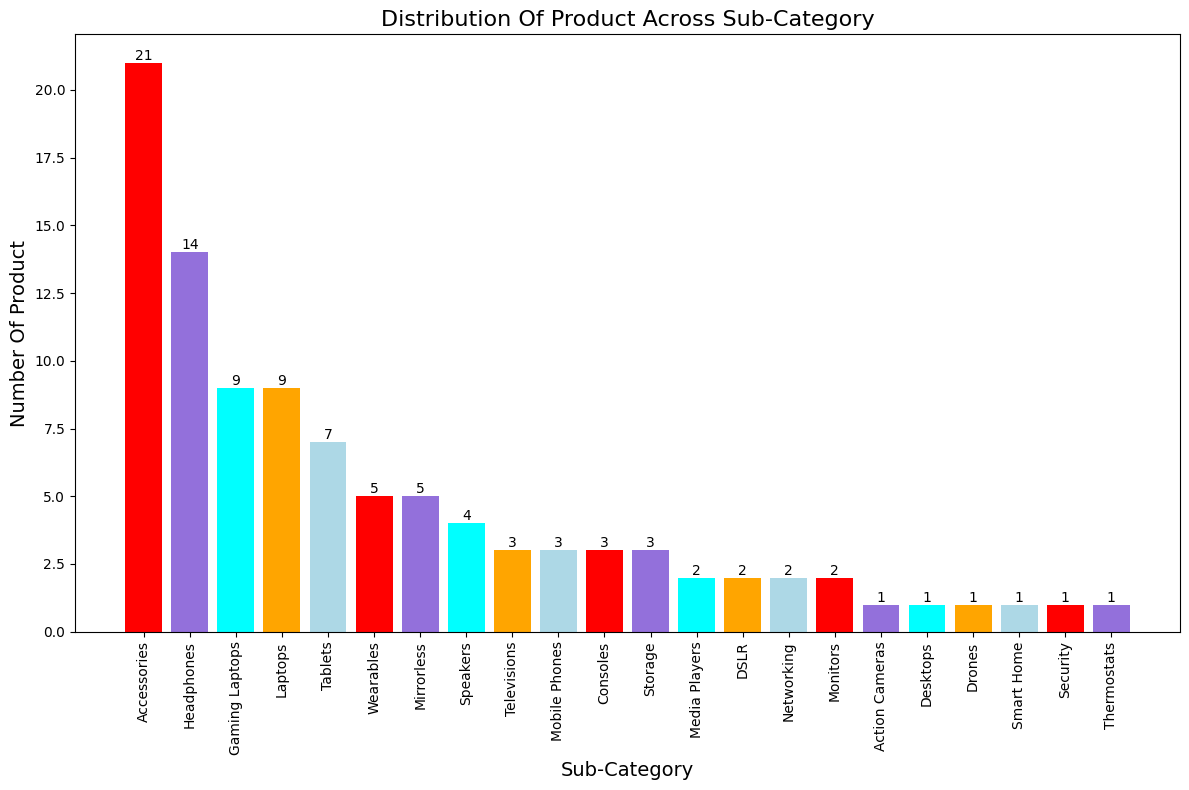

In [27]:
import matplotlib.pyplot as plt
total_customer = product_data.groupby('sub_category')['product_id'].count().sort_values(ascending=False)
print(total_customer)
plt.figure(figsize=(12, 8))
bars = plt.bar(total_customer.index, total_customer.values, color=['red','mediumpurple','cyan','orange','lightblue'])
plt.xticks(rotation=90)
plt.title('Distribution Of Product Across Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Number Of Product', fontsize=14)
plt.bar_label(bars)
plt.tight_layout()
plt.show()


○ Identify products with low stock levels

sub_category
Accessories       21
Headphones        14
Gaming Laptops     9
Laptops            9
Tablets            7
Wearables          5
Mirrorless         5
Speakers           4
Televisions        3
Mobile Phones      3
Consoles           3
Storage            3
Media Players      2
DSLR               2
Networking         2
Monitors           2
Action Cameras     1
Desktops           1
Drones             1
Smart Home         1
Security           1
Thermostats        1
Name: product_id, dtype: int64


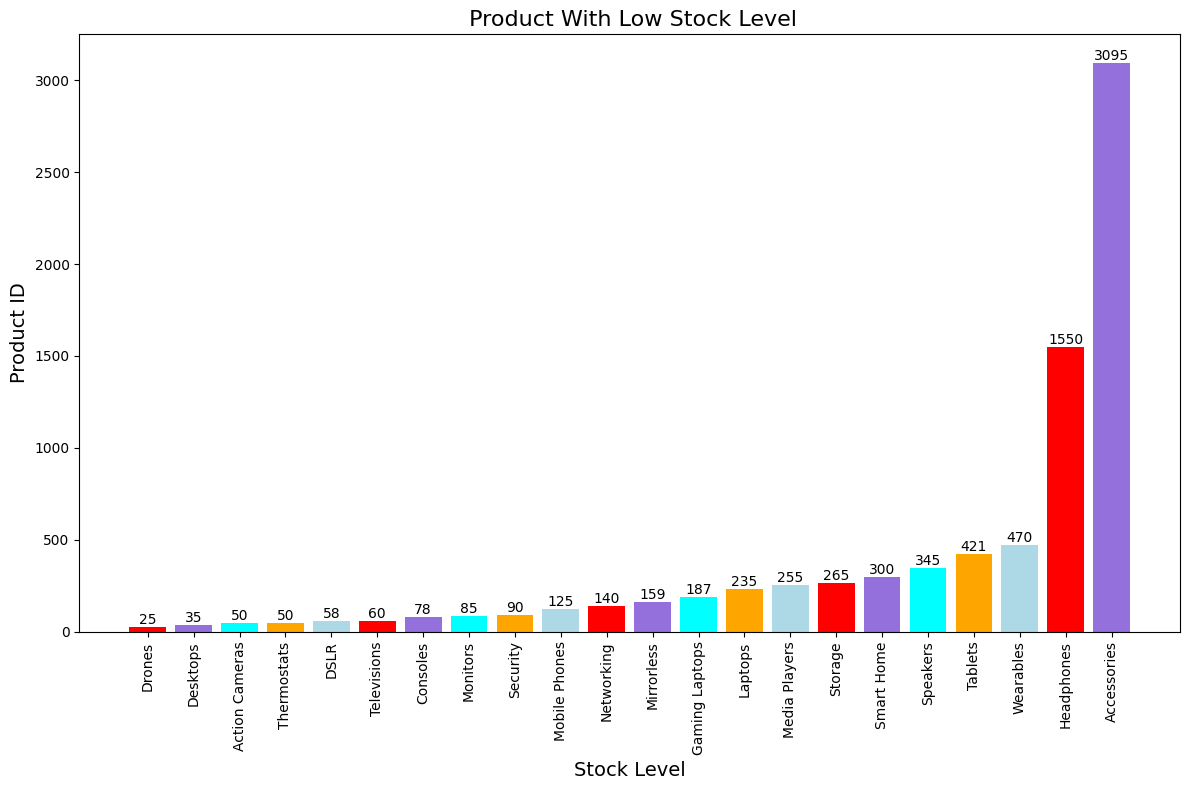

In [28]:
import matplotlib.pyplot as plt
stock_level = product_data.groupby('sub_category')['stock'].sum().sort_values(ascending=True)
print(total_customer)
plt.figure(figsize=(12, 8))
bars = plt.bar(stock_level.index, stock_level.values, color=['red','mediumpurple','cyan','orange','lightblue'])
plt.xticks(rotation=90)
plt.title(' Product With Low Stock Level', fontsize=16)
plt.xlabel('Stock Level', fontsize=14)
plt.ylabel('Product ID', fontsize=14)
plt.bar_label(bars)
plt.tight_layout()
plt.show()



○ Calculate the average, maximum, and minimum selling prices for products.


Order Amount Analysis:
Total Amount:  54750
Average Order Amount:  547.5
Maximum Order Amount:  2299
Minimum Order Amount:  39


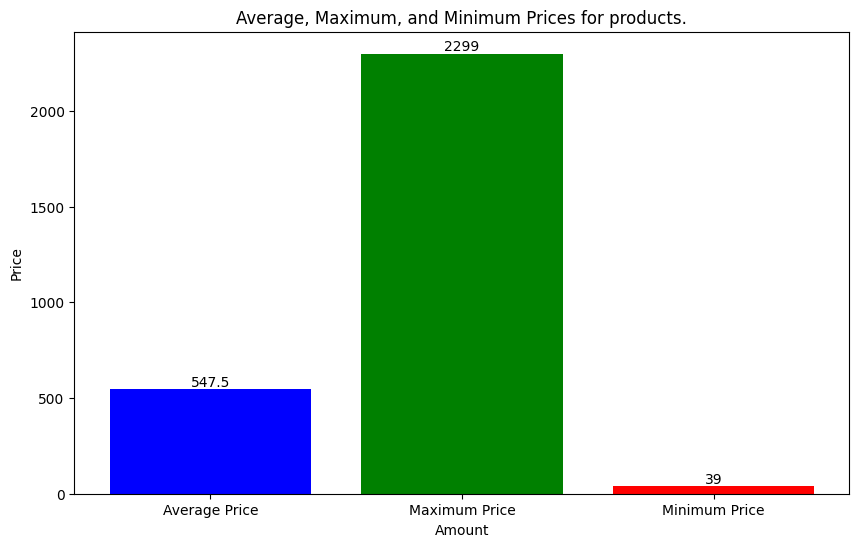

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("\nOrder Amount Analysis:")
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()

print("Total Amount: ", product_data['selling_price'].sum())
print("Average Order Amount: ",average_price)
print("Maximum Order Amount: ",max_price)
print("Minimum Order Amount: ",min_price)
stats = {
    'Average Price': average_price,
    'Maximum Price': max_price,
    'Minimum Price': min_price
}
plt.figure(figsize=(10, 6))
bars=plt.bar(stats.keys(), stats.values(), color=['blue', 'green', 'red'])
plt.title('Average, Maximum, and Minimum Prices for products.')
plt.xlabel('Amount')
plt.ylabel('Price')
plt.bar_label(bars)
plt.show()

 # Order Analysis:-

○ Calculate the top 10 orders product wise

    order_id customer_id product_id  quantity  total_price   payment_mode  \
23        24     CUST024    PROD038         4          519     Debit Card   
31        32     CUST032    PROD054         4         2519         PayPal   
15        16     CUST016    PROD022         4         1399    Credit Card   
7          8     CUST008    PROD006         4          359     Debit Card   
75        76     CUST076    PROD041         4         1399         PayPal   
83        84     CUST084    PROD057         4         1599     Debit Card   
95        96     CUST096    PROD081         4          559    Credit Card   
87        88     CUST088    PROD065         4         7599  Bank Transfer   
59        60     CUST060    PROD009         4          999     Debit Card   
67        68     CUST068    PROD025         4         1999  Bank Transfer   

            order_date order_status  
23 2024-08-24 09:15:00    Delivered  
31 2024-09-01 10:15:00    Delivered  
15 2024-08-16 18:30:00    Delivered  


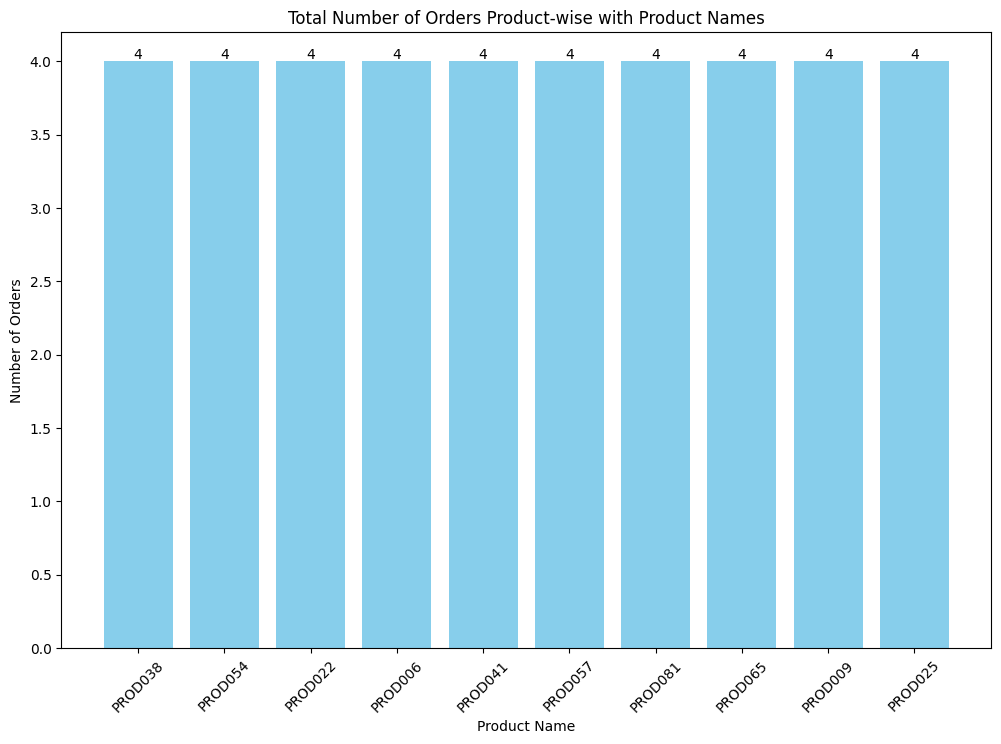

In [30]:
plt.figure(figsize=(12, 8))
top_10_customers = order_data.sort_values(by='quantity', ascending=False).head(10)
print(top_10_customers)
bars=plt.bar (top_10_customers['product_id'], top_10_customers['quantity'], color='skyblue')

# Set chart title and labels
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.bar_label(bars)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

○ Analyze the order status distribution (e.g., pending, delivered).

sub_category
Accessories       21
Headphones        14
Gaming Laptops     9
Laptops            9
Tablets            7
Wearables          5
Mirrorless         5
Speakers           4
Televisions        3
Mobile Phones      3
Consoles           3
Storage            3
Media Players      2
DSLR               2
Networking         2
Monitors           2
Action Cameras     1
Desktops           1
Drones             1
Smart Home         1
Security           1
Thermostats        1
Name: product_id, dtype: int64


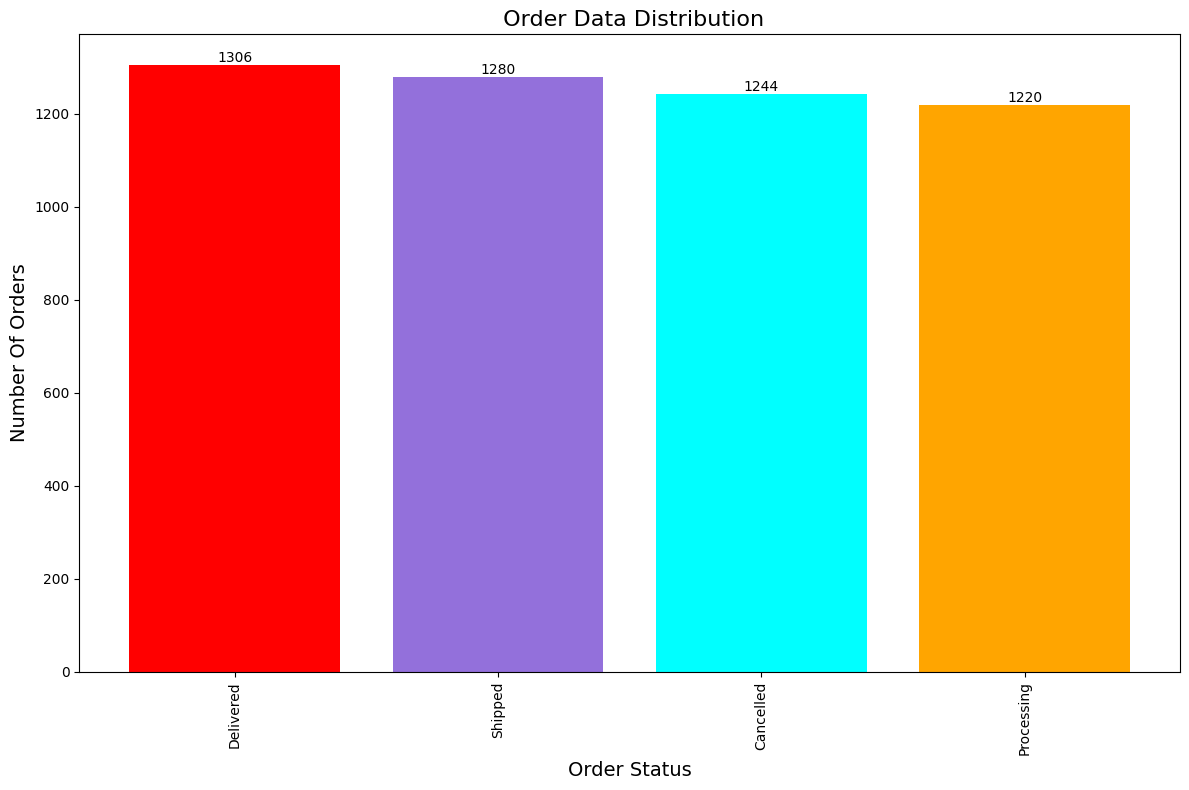

In [31]:
order_status=order_data.groupby('order_status')['order_id'].sum().sort_values(ascending=False)
print(total_customer)
plt.figure(figsize=(12, 8))
bars = plt.bar(order_status.index, order_status.values, color=['red','mediumpurple','cyan','orange','lightblue'])
plt.xticks(rotation=90)
plt.title(' Order Data Distribution', fontsize=16)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Number Of Orders', fontsize=14)
plt.bar_label(bars)
plt.tight_layout()
plt.show()



○  Identify the most popular products based on order quantity.

C:\Users\bhagw\AppData\Local\Temp\ipykernel_18624\1684354088.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)


  product_id  total_quantity             product_name
0    PROD009             5.0  Bose QuietComfort 35 II
1    PROD001             4.0          Apple iPhone 13
2    PROD022             4.0              GoPro HERO9
3    PROD057             4.0        Amazon Fire HD 10
4    PROD054             4.0            Canon EOS M50
5    PROD006             4.0     Logitech MX Master 3
6    PROD007             4.0     Apple Watch Series 7
7    PROD041             4.0       WD My Passport 4TB
8    PROD038             4.0      Razer BlackWidow V3
9    PROD025             4.0        Apple Mac Mini M1


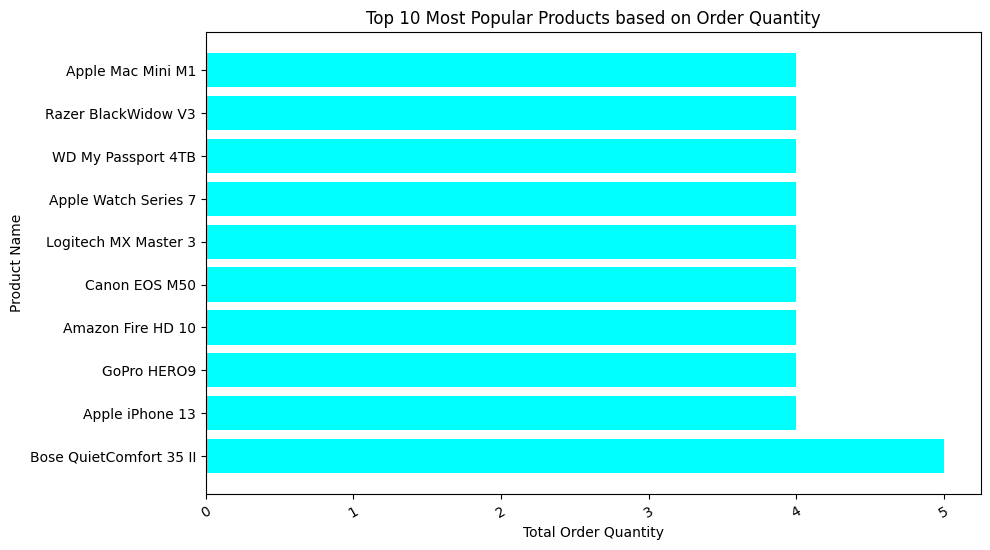

In [32]:
cursor.execute("SELECT product_id, SUM(quantity) AS total_quantity FROM order_details GROUP BY product_id ORDER BY total_quantity DESC LIMIT 10")
product_popularity = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_quantity'])
# Join with product table to get product names
product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)
merged_data = product_popularity.merge(product_quantity, on='product_id')
print(merged_data)
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_data['product_name'], merged_data['total_quantity'],color='cyan')
# Set chart title and labels
plt.title('Top 10 Most Popular Products based on Order Quantity')
plt.ylabel('Product Name')
plt.xlabel('Total Order Quantity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)
# Show the chart
plt.show()

# Sales Analysis:-

○  Calculate total revenue generated from orders product wise.

  product_id  total_revenue           product_name     category  \
0    PROD065        7599.96       MSI GS66 Stealth    Computers   
1    PROD029        4199.98  Roku Streaming Stick+  Electronics   
2    PROD070        3999.96             Dell G5 15    Computers   
3    PROD073        3899.97             HP Omen 15    Computers   
4    PROD001        3599.96        Apple iPhone 13  Electronics   
5    PROD069        3399.98            LG Gram 17"    Computers   
6    PROD049        3299.97         Apple Watch SE  Electronics   
7    PROD089        3199.96    Razer DeathAdder V2  Electronics   
8    PROD005        2849.97         MacBook Air M1    Computers   
9    PROD017        2699.97            Nikon D5600      Cameras   

     sub_category  original_price  selling_price  stock  
0  Gaming Laptops            1999           1899     18  
1   Media Players              49             39    180  
2  Gaming Laptops            1099            999     25  
3  Gaming Laptops            1

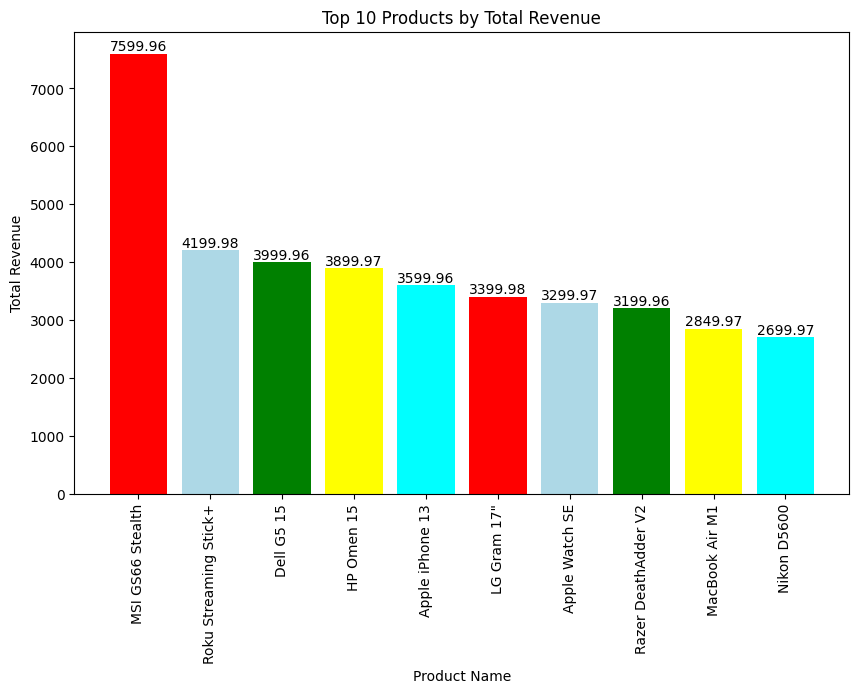

In [33]:
cursor.execute("SELECT product_id, SUM(total_price) AS total_revenue FROM order_details GROUP BY product_id ORDER BY total_revenue DESC LIMIT 10")
revenue_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

merged_data = pd.merge(revenue_data, product_data, on='product_id')
print(merged_data)
# Create the bar chart
plt.figure(figsize=(10, 6))
bars=plt.bar(merged_data['product_name'], merged_data['total_revenue'],color=['red','lightblue','green','yellow','cyan'])

# Set chart title and labels
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.bar_label(bars)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Show the chart
plt.show()

○  Calculate total revenue product category wise percentage.

   product_id  total_revenue             product_name     category  \
0     PROD065        7599.96         MSI GS66 Stealth    Computers   
1     PROD029        4199.98    Roku Streaming Stick+  Electronics   
2     PROD070        3999.96               Dell G5 15    Computers   
3     PROD073        3899.97               HP Omen 15    Computers   
4     PROD001        3599.96          Apple iPhone 13  Electronics   
5     PROD069        3399.98              LG Gram 17"    Computers   
6     PROD049        3299.97           Apple Watch SE  Electronics   
7     PROD089        3199.96      Razer DeathAdder V2  Electronics   
8     PROD005        2849.97           MacBook Air M1    Computers   
9     PROD017        2699.97              Nikon D5600      Cameras   
10    PROD026        2599.98       LG OLED55CXPUA 55"  Electronics   
11    PROD062        2549.97               HP Envy 13    Computers   
12    PROD054        2519.96            Canon EOS M50      Cameras   
13    PROD010       

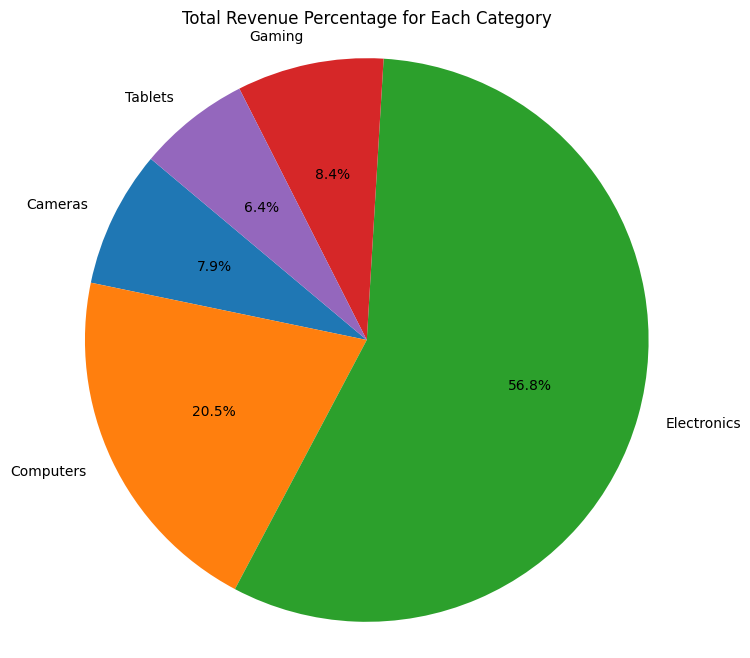

In [34]:
cursor.execute("SELECT product_id, SUM(total_price) AS total_revenue FROM order_details GROUP BY product_id ORDER BY total_revenue DESC LIMIT 30")
revenue_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

merged_data = pd.merge(revenue_data, product_data, on='product_id')
print(merged_data)
category_revenue = merged_data.groupby(product_data['category'])['total_revenue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)  # Add labels and percentages

# Set chart title
plt.title('Total Revenue Percentage for Each Category')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Show the chart
plt.show()

○ Calculate the total revenue generated from all orders.

  product_id  total_revenue           product_name     category  \
0    PROD065        7599.96       MSI GS66 Stealth    Computers   
1    PROD029        4199.98  Roku Streaming Stick+  Electronics   
2    PROD070        3999.96             Dell G5 15    Computers   
3    PROD073        3899.97             HP Omen 15    Computers   
4    PROD001        3599.96        Apple iPhone 13  Electronics   
5    PROD069        3399.98            LG Gram 17"    Computers   
6    PROD049        3299.97         Apple Watch SE  Electronics   
7    PROD089        3199.96    Razer DeathAdder V2  Electronics   
8    PROD005        2849.97         MacBook Air M1    Computers   
9    PROD017        2699.97            Nikon D5600      Cameras   

     sub_category  original_price  selling_price  stock  
0  Gaming Laptops            1999           1899     18  
1   Media Players              49             39    180  
2  Gaming Laptops            1099            999     25  
3  Gaming Laptops            1

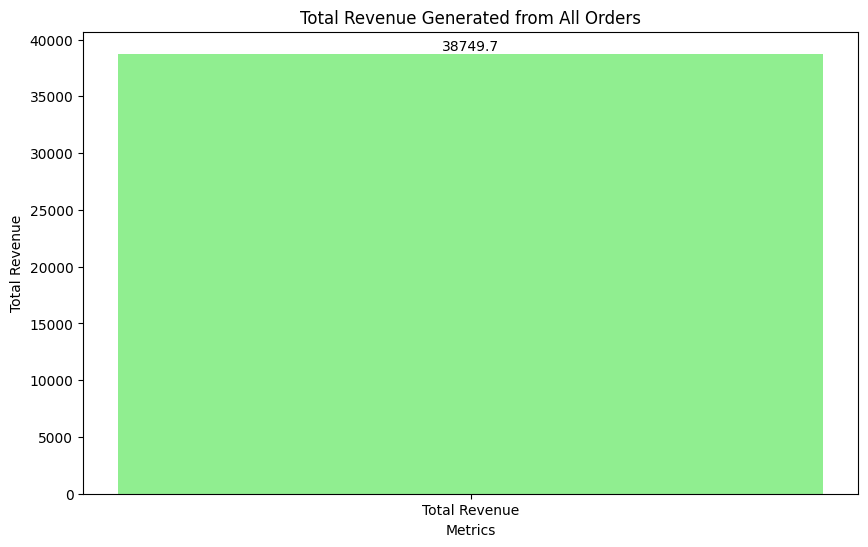

In [35]:
cursor.execute("SELECT product_id, SUM(total_price) AS total_revenue FROM order_details GROUP BY product_id ORDER BY total_revenue DESC LIMIT 10")
revenue_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

merged_data = pd.merge(revenue_data, product_data, on='product_id')
print(merged_data)
# Calculate total revenue
total_revenue = merged_data['total_revenue'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars=plt.bar(['Total Revenue'], [total_revenue], color='lightgreen')

# Set chart title and labels
plt.title('Total Revenue Generated from All Orders')
plt.xlabel('Metrics')
plt.ylabel('Total Revenue')
plt.bar_label(bars)
# Show the chart
plt.show()


○  Identify the most profitable products based on the difference between original and selling prices.

   product_id           product_name     category    sub_category  \
0     PROD001        Apple iPhone 13  Electronics   Mobile Phones   
3     PROD004            Dell XPS 13    Computers         Laptops   
15    PROD016     Asus ROG Strix G15    Computers  Gaming Laptops   
9     PROD010        HP Spectre x360    Computers         Laptops   
27    PROD028      Sony A8H OLED 65"  Electronics     Televisions   
25    PROD026     LG OLED55CXPUA 55"  Electronics     Televisions   
26    PROD027  Samsung QLED Q80T 65"  Electronics     Televisions   
54    PROD055    Panasonic Lumix GH5      Cameras      Mirrorless   
63    PROD064         Razer Blade 15    Computers  Gaming Laptops   
51    PROD052          Fujifilm X-T4      Cameras      Mirrorless   

    original_price  selling_price  stock  profit  
0              999            899     50    -100  
3             1199           1099     25    -100  
15            1499           1399     22    -100  
9             1299           1199   

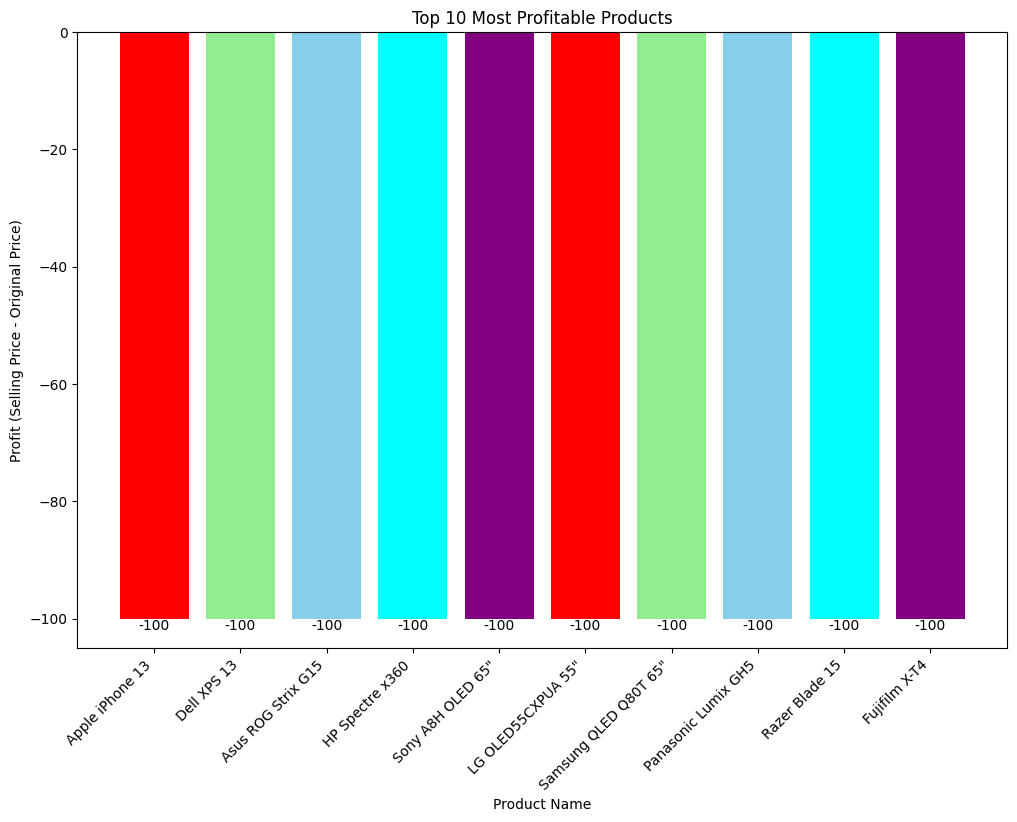

In [36]:
product_data['profit'] = product_data['selling_price'] - product_data['original_price']
# Sort the DataFrame by profit
top_10_profitable_products = product_data.sort_values(by='profit', ascending=True).head(10)
print(top_10_profitable_products)
# Plotting the graph
plt.figure(figsize=(12, 8))
bars=plt.bar(top_10_profitable_products['product_name'], top_10_profitable_products['profit'],color=['red','lightgreen','skyblue','cyan','purple'])
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.xticks(rotation=45, ha='right')
plt.bar_label(bars)
plt.show()


#  Customer Order Patterns:-

○  Identify product names with the highest and lowest order quantities.

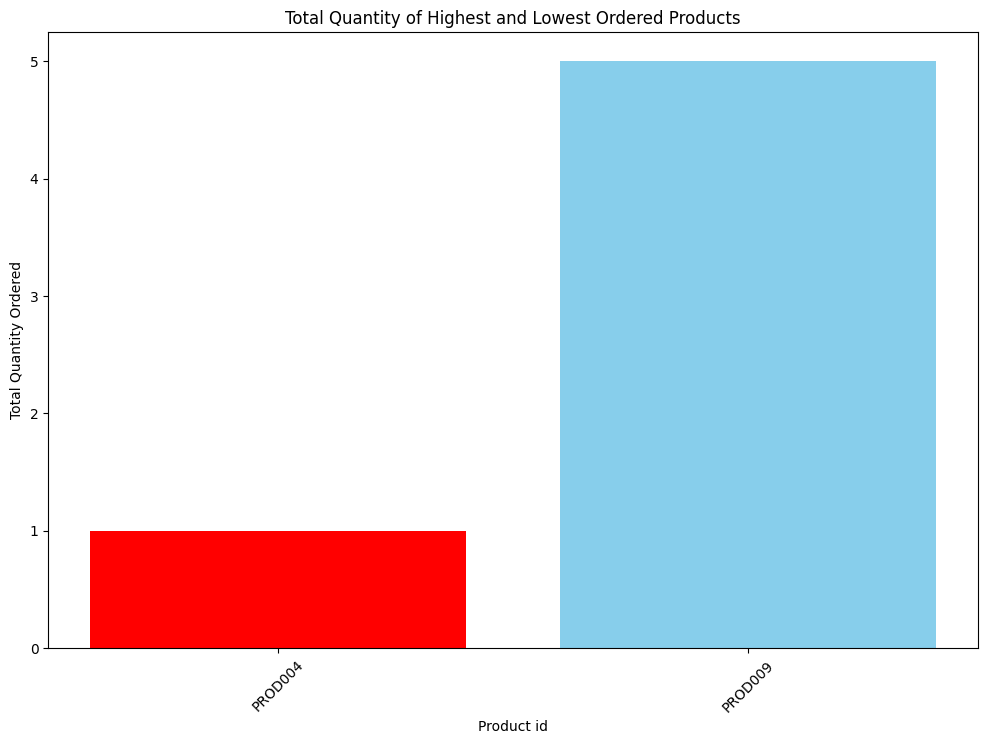

In [37]:
# Group by product_id and sum the quantities
product_quantity = order_data.groupby('product_id')['quantity'].sum()
# Sort the quantities to find the highest and lowest ordered products
sorted_product_quantity = product_quantity.sort_values()
lowest_ordered = sorted_product_quantity.index[0]
highest_ordered = sorted_product_quantity.index[-1]
# Plotting the bar chart
plt.figure(figsize=(12,8))
plt.bar([lowest_ordered, highest_ordered],
        [sorted_product_quantity[lowest_ordered], sorted_product_quantity[highest_ordered]],
        color=['red', 'skyblue'])
plt.title('Total Quantity of Highest and Lowest Ordered Products')
plt.xlabel('Product id')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

○   Identify customers with the highest and lowest order quantities by customer name.

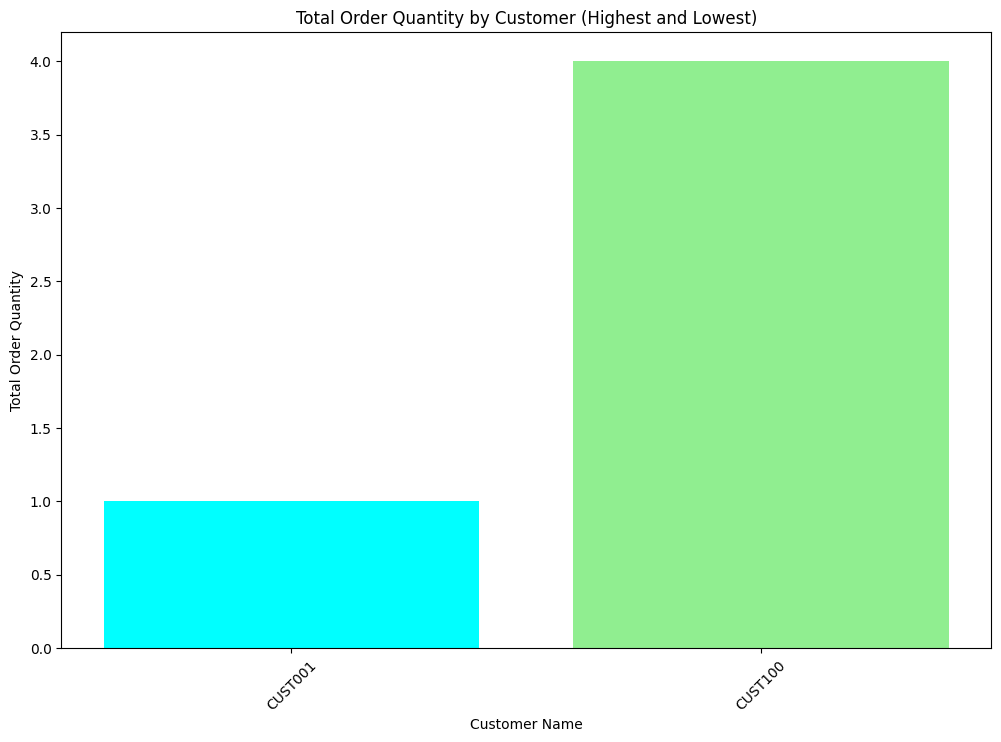

In [38]:
#  Identify customers with the highest and lowest order quantities by customer name.

# Group by product_id and sum the quantities
customer_quantity = order_data.groupby('customer_id')['quantity'].sum()
# Sort the quantities to find the highest and lowest ordered products
sorted_product_quantity = customer_quantity.sort_values()

lowest_ordered = sorted_product_quantity.index[0]
highest_ordered = sorted_product_quantity.index[-1]
# Plotting the bar chart
plt.figure(figsize=(12,8))
plt.bar([lowest_ordered, highest_ordered],
        [sorted_product_quantity[lowest_ordered], sorted_product_quantity[highest_ordered]],color=['Cyan','Lightgreen'])
plt.xlabel("Customer Name")
plt.ylabel("Total Order Quantity")
plt.title("Total Order Quantity by Customer (Highest and Lowest)")
plt.xticks(rotation=45)
plt.show()

○   Determine the most preferred payment modes.

payment_mode
Bank Transfer    40
PayPal           41
Debit Card       45
Credit Card      62
Name: quantity, dtype: int64


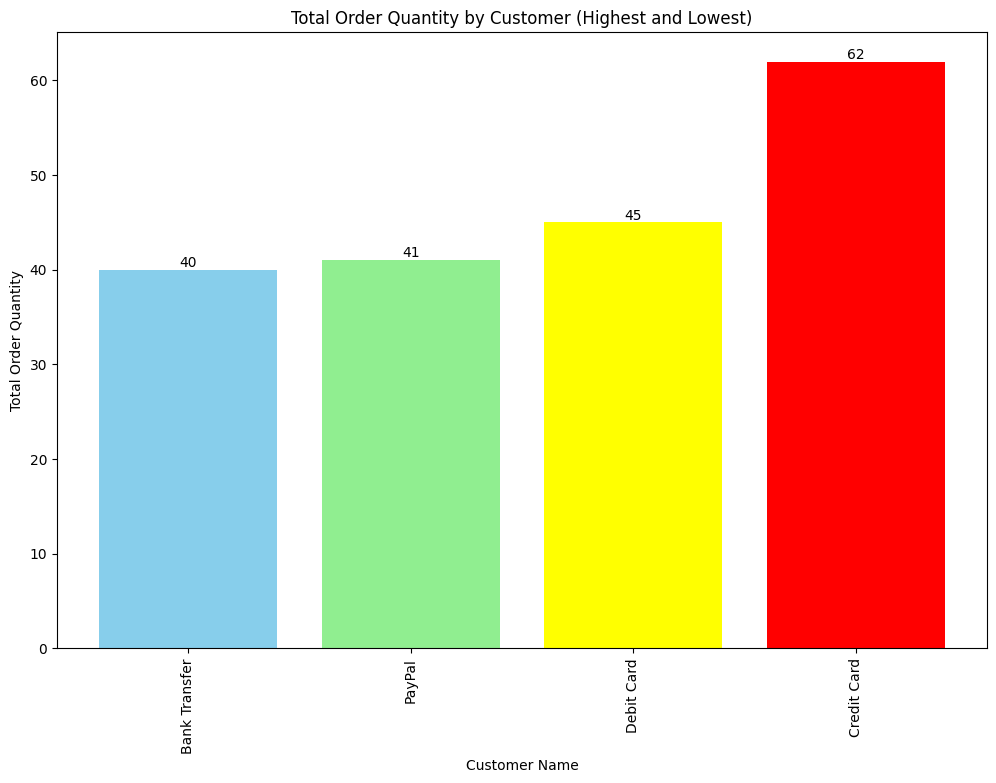

In [39]:
# Group by product_id and sum the quantities
payment_quantity = order_data.groupby('payment_mode')['quantity'].sum().sort_values()
print(payment_quantity)
plt.figure(figsize=(12,8))
# Plotting the bar chart
bars=plt.bar(payment_quantity.index,payment_quantity,color=['skyblue','lightgreen','yellow','red'])
plt.xlabel("Customer Name")
plt.ylabel("Total Order Quantity")
plt.title("Total Order Quantity by Customer (Highest and Lowest)")
plt.xticks(rotation=90)
plt.bar_label(bars)
plt.show()

#  Time-based Analysis:-

○  Month and year wise total sales

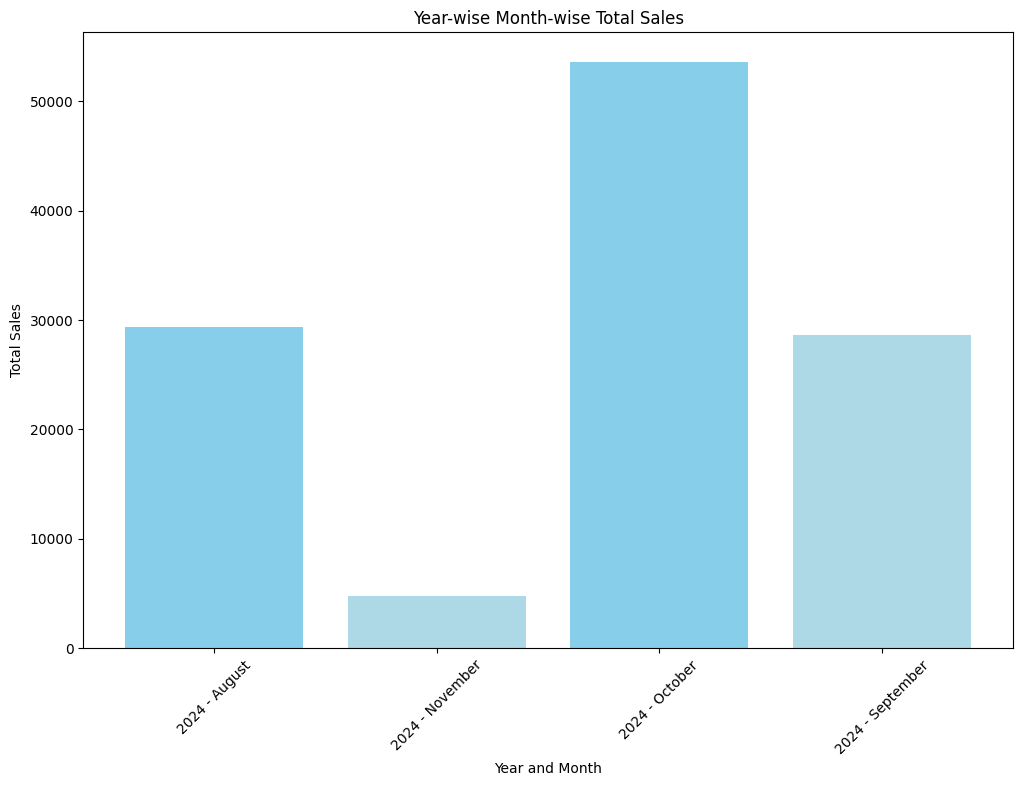

In [40]:

order_data['year'] = order_data['order_date'].dt.year
order_data['month'] =order_data['order_date'].dt.strftime('%B')
# Group by year and month, then sum the total price
year_month_sales = order_data.groupby(['year', 'month'])['total_price'].sum().reset_index()
# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(year_month_sales['year'].astype(str) + ' - ' + year_month_sales['month'], year_month_sales['total_price'],color=['skyblue','lightblue'])
plt.xlabel('Year and Month')
plt.ylabel('Total Sales')
plt.title('Year-wise Month-wise Total Sales')
plt.xticks(rotation=45)
plt.show()

○ Identify peak order date.


order_date
2024-08-01 10:15:00    1
2024-08-03 15:45:00    1
2024-08-07 16:50:00    1
2024-08-05 09:00:00    1
2024-08-13 10:45:00    1
                      ..
2024-10-07 11:00:00    4
2024-11-04 11:00:00    4
2024-10-27 09:00:00    4
2024-10-23 14:30:00    4
2024-11-08 18:00:00    4
Name: quantity, Length: 100, dtype: int64


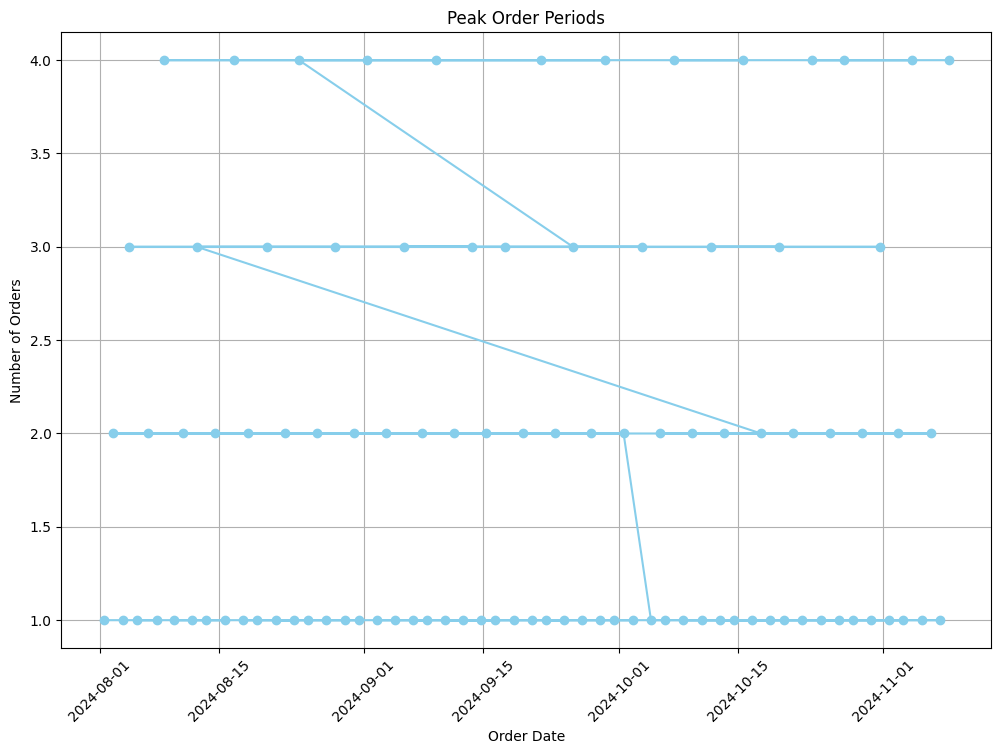

In [41]:
date_wise_sales = order_data.groupby('order_date')['quantity'].sum().sort_values()
print(date_wise_sales)
# Create line chart
plt.figure(figsize=(12, 8))
plt.plot(date_wise_sales.index,date_wise_sales.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Peak Order Periods')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

○  Month wise total sales.

order_date
October      53649
August       29379
September    28680
November      4772
Name: total_price, dtype: int64


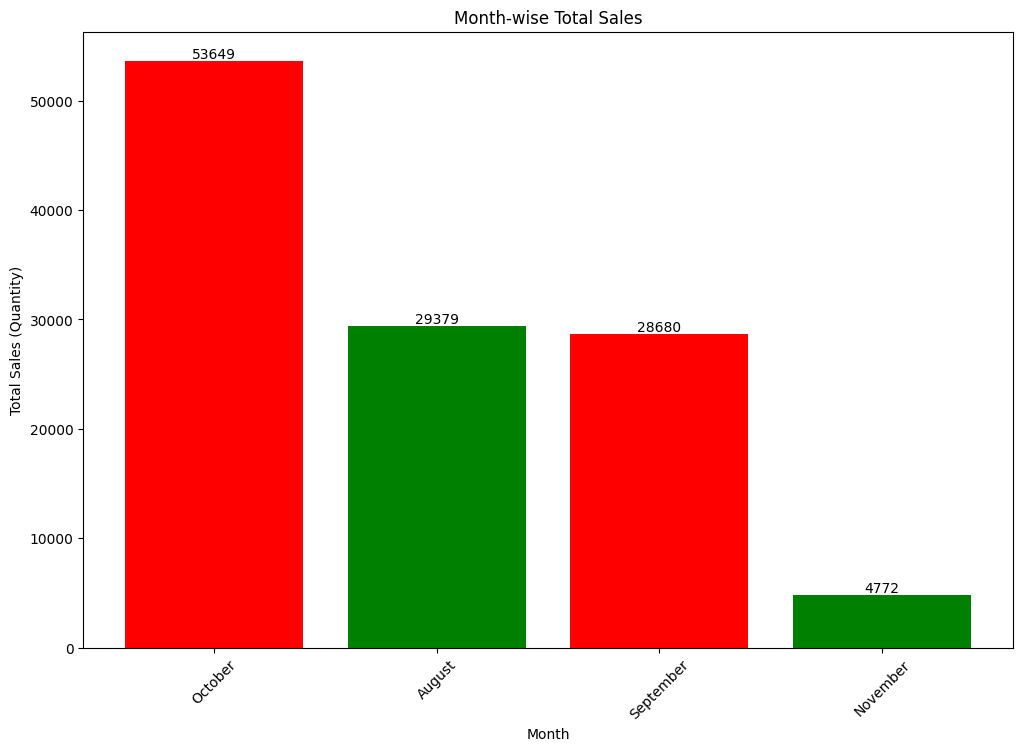

In [42]:
order_data['order_date'] = order_data['order_date'].dt.strftime('%B')
# Assuming 'month' column exists in 'order_data' DataFrame
month_wise_sales = order_data.groupby('order_date')['total_price'].sum().sort_values(ascending=False)
print(month_wise_sales)
plt.figure(figsize=(12,8))
# Plotting the bar chart
bars=plt.bar(month_wise_sales.index, month_wise_sales,color=['red','green'])
plt.xlabel("Month")
plt.ylabel("Total Sales (Quantity)")
plt.title("Month-wise Total Sales")
plt.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

 # Geographical Analysis:-

○  Explore the distribution of customers across different cities.

city
New York         27
Chicago          25
Los Angeles      25
San Francisco    23
Name: customer_id, dtype: int64


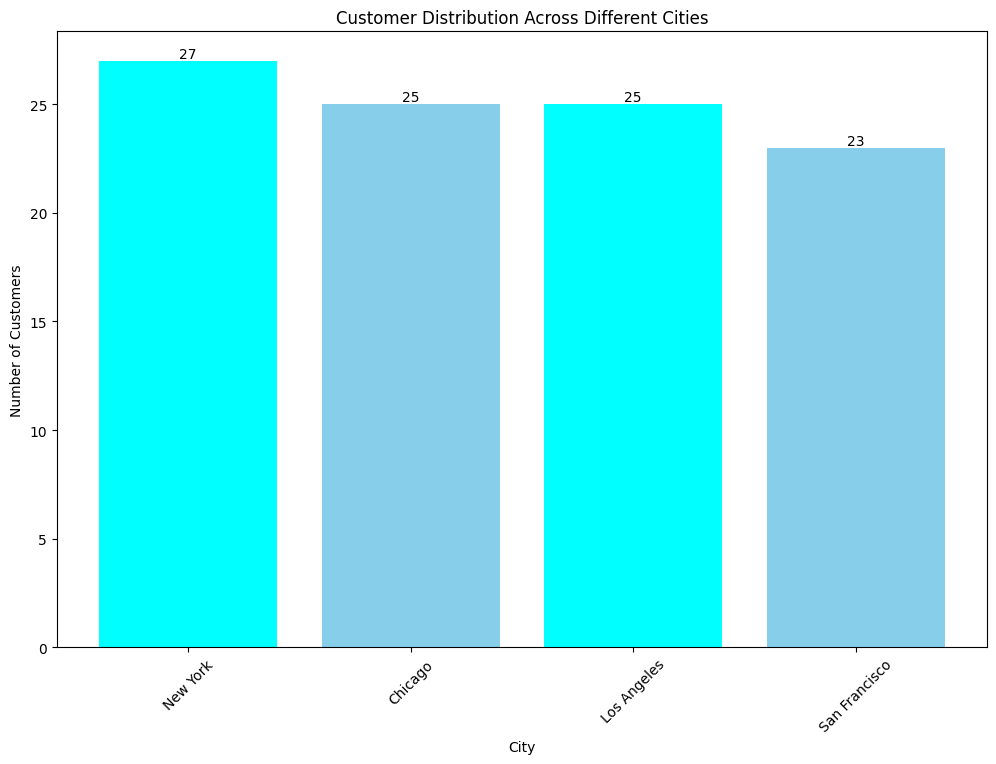

In [43]:
city_wise = customer_data.groupby('city')['customer_id'].count().sort_values(ascending=False)
print(city_wise)
plt.figure(figsize=(12, 8))
bars=plt.bar(city_wise.index, city_wise.values,color=['cyan','skyblue'])  
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution Across Different Cities")
plt.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

○

# Product Performance:-


○  Identify the best-selling products.

C:\Users\bhagw\AppData\Local\Temp\ipykernel_18624\1100461993.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)


  product_id  total_quantity             product_name
0    PROD009             5.0  Bose QuietComfort 35 II
1    PROD001             4.0          Apple iPhone 13
2    PROD022             4.0              GoPro HERO9
3    PROD057             4.0        Amazon Fire HD 10
4    PROD054             4.0            Canon EOS M50
5    PROD006             4.0     Logitech MX Master 3
6    PROD007             4.0     Apple Watch Series 7
7    PROD041             4.0       WD My Passport 4TB
8    PROD038             4.0      Razer BlackWidow V3
9    PROD025             4.0        Apple Mac Mini M1


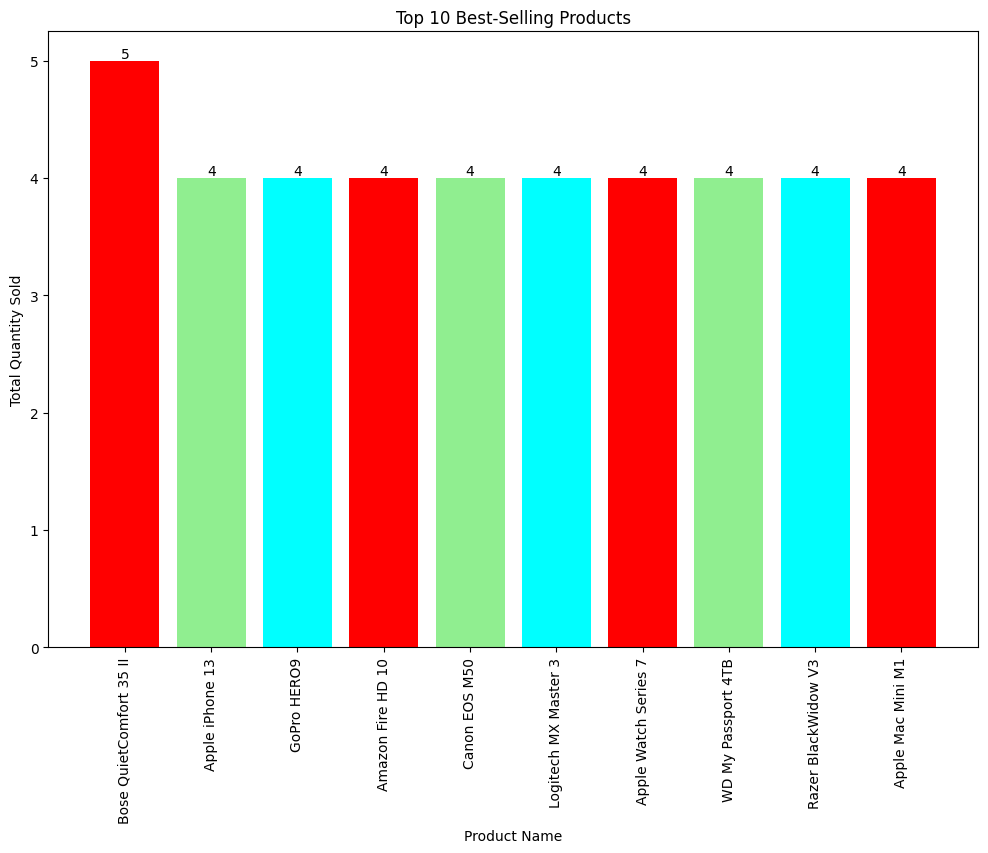

In [44]:
cursor.execute("SELECT product_id, SUM(quantity) AS total_quantity FROM order_details GROUP BY product_id ORDER BY total_quantity DESC LIMIT 10")
product_selling = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_quantity'])

product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)
merged_data = product_selling.merge(product_quantity, on='product_id')
print(merged_data)
# Create the bar chart
plt.figure(figsize=(12, 8))
bars=plt.bar(merged_data['product_name'], merged_data['total_quantity'],color=['red','lightgreen','cyan'])
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Name')
plt.title('Top 10 Best-Selling Products')
plt.bar_label(bars)
plt.xticks(rotation=90)

plt.show()

○  Identify top 10 slow-moving products based on low sales.

C:\Users\bhagw\AppData\Local\Temp\ipykernel_18624\3486466709.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)


  product_id  total_quantity             product_name
0    PROD015             1.0  Microsoft Xbox Series X
1    PROD023             1.0          Fitbit Charge 4
2    PROD019             1.0        Apple AirPods Pro
3    PROD004             1.0              Dell XPS 13
4    PROD016             1.0       Asus ROG Strix G15
5    PROD024             1.0          Nintendo Switch
6    PROD100             1.0     HyperX Alloy FPS Pro
7    PROD008             1.0           Google Pixel 6
8    PROD012             1.0      Apple iPad Pro 12.9
9    PROD020             1.0  Microsoft Surface Pro 7


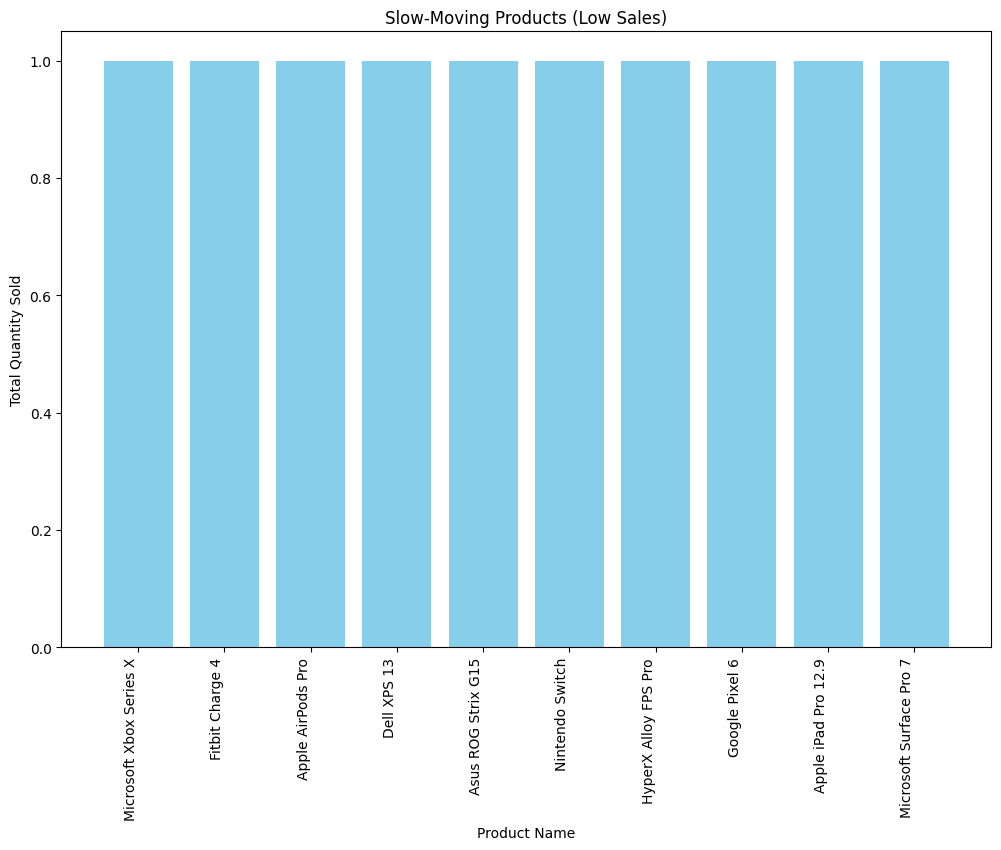

In [45]:
cursor.execute("SELECT product_id, SUM(quantity) AS total_quantity FROM order_details GROUP BY product_id ORDER BY total_quantity ASC LIMIT 10")
product_selling = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_quantity'])

product_quantity = pd.read_sql_query("SELECT product_id, product_name FROM product", connection)
merged_data = product_selling.merge(product_quantity, on='product_id')
print(merged_data)
# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(merged_data['product_name'], merged_data['total_quantity'],color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')  # Match label with y-axis
plt.title('Slow-Moving Products (Low Sales)')

plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

plt.show()

 # Payment Analysis:-


 ○ Display successful and pending payments order counts.

  order_status  order_count
0      Shipped           26
1    Delivered           26
2   Processing           24
3    Cancelled           24


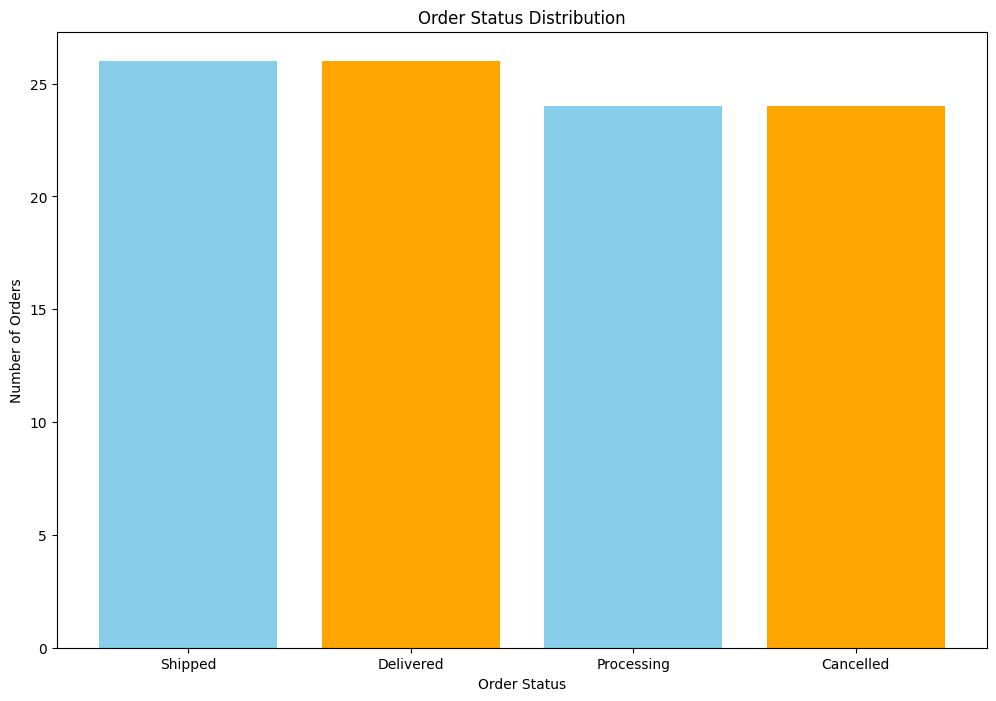

In [46]:
cursor.execute("SELECT order_status, COUNT(*) AS order_count FROM order_details GROUP BY order_status")
order_status_data = pd.DataFrame(cursor.fetchall(), columns=['order_status', 'order_count'])
print(order_status_data)

plt.figure(figsize=(12, 8))
plt.bar(order_status_data['order_status'], order_status_data['order_count'],color=['skyblue','orange'])
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.show()

# Conclusion:-

1- Sales Distribution Across Cities:
    ● Key Insight: The analysis of sales by city revealed that New York , chicago and Los Angeles are significant contributors to the overall sales. However, New York had higher sales figures, indicating a strong customer base.
    
2- Product-Wise Sales Analysis:
    ● Key Insight: Among the products analyzed, the Apple iPhone 13 and Sony WH-1000XM4 headphones had notable sales, with the iPhone being particularly popular. This suggests a strong customer preference for high-end electronics.

3- Payment Mode Preferences:
    ● Key Insight: Key Insight: Credit Card and PayPal are the most frequently used payment methods, indicating customer preference for secure and convenient payment options.

4- Order Patterns and Customer Behavior:
    ● Key Insight: The analysis showed that customers tend to make significant purchases, often opting for high-value items. The prompt fulfillment of orders, as evidenced by the "Shipped" and "Delivered" statuses, suggests efficient operations.


# Future Work:

1- Expand Marketing in High-Performing Regions: Focus on areas like New York, where sales are strong, while also increasing visibility in regions with untapped potential.

2- Optimize Inventory Management: Ensure that high-demand products are always in stock to meet customer expectations and avoid missed sales opportunities.

3- Enhance Payment Flexibility: Introduce additional payment methods that cater to diverse customer preferences, potentially attracting more customers and increasing conversion rates.

4- Potential Analysis: Investigate potential new market segments or geographical regions that could be targeted for expansion. This can help in identifying untapped opportunities for growth.

5- Leverage Customer Data for Personalization: Use the insights from customer behavior to tailor marketing campaigns, product recommendations, and special offers, thereby enhancing the overall customer experience.